In [86]:
import pandas as pd
import numpy as np
import spacy
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("justin_tweets.csv")

In [3]:
df.shape

(10311, 34)

In [4]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1269641402633326597,1269641402633326597,1591541073000,2020-06-07,10:44:33,EDT,155933135,muzzeltov,#BlackLivesMatter ✊🏿✊🏾✊🏽✊🏼,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '155933135', 'username': 'muzzelt...",NaN,NaN,NaN,NaN
1,1269634249528918016,1269634249528918016,1591539368000,2020-06-07,10:16:08,EDT,155933135,muzzeltov,#BlackLivesMatter ✊🏿✊🏾✊🏽✊🏼,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '155933135', 'username': 'muzzelt...",NaN,NaN,NaN,NaN
2,1269444532619313152,1269432774387273731,1591494136000,2020-06-06,21:42:16,EDT,155933135,muzzeltov,#BlackLivesMatter ✊🏿✊🏾✊🏽✊🏼,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '155933135', 'username': 'muzzelt...",NaN,NaN,NaN,NaN
3,1269351129734950915,1269351129734950915,1591471867000,2020-06-06,15:31:07,EDT,155933135,muzzeltov,#BlackLivesMatter ✊🏿✊🏾✊🏽✊🏼,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '155933135', 'username': 'muzzelt...",NaN,NaN,NaN,NaN
4,1269319279347933184,1269319279347933184,1591464273000,2020-06-06,13:24:33,EDT,155933135,muzzeltov,#BlackLivesMatter ✊🏿✊🏾✊🏽✊🏼,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '155933135', 'username': 'muzzelt...",NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo',
       'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to',
       'retweet_date', 'translate', 'trans_src', 'trans_dest'],
      dtype='object')

In [6]:
keep = ['date','time','user_id','tweet','mentions','replies_count',
        'retweets_count', 'likes_count', 'hashtags']

In [7]:
tweet_df = df.copy()[keep]

In [8]:
tweet_df.head()

,date,time,user_id,tweet,mentions,replies_count,retweets_count,likes_count,hashtags
0,2020-06-07,10:44:33,155933135,This sounds like every speech ever given by @r...,['realdonaldtrump'],3,4,19,[]
1,2020-06-07,10:16:08,155933135,1) “Thank you” for lifting this on the last da...,[],0,0,2,[]
2,2020-06-06,21:42:16,155933135,"This is a beautiful idea, James! I love it! 🥰",['jamesholod'],0,0,0,[]
3,2020-06-06,15:31:07,155933135,All. Police. Are. Trash. https://twitter.com/a...,[],0,0,12,[]
4,2020-06-06,13:24:33,155933135,Imagine choosing to side with police brutality...,[],6,8,45,[]


In [9]:
likes = tweet_df.likes_count.sum()
print (f'Total likes: {likes}')

Total likes: 57242


In [10]:
replies = tweet_df.replies_count.sum()
print (f'Total likes: {replies}')

Total likes: 4251


In [220]:
type(tweet_df.mentions[0])

list

In [221]:
mention_count = {}
for mention in tweet_df.mentions:
    if len(mention) !=0 :
        for person in mention:
            mention_count[person] = mention_count.get(person, 0) + 1
    

In [12]:
#make tweets list from string
tweet_df.mentions = tweet_df.mentions.apply(lambda x: eval(x))

In [14]:
import spacy

nlp = spacy.load("en_core_web_md")

In [15]:
nlp_df = df.copy()[['date','tweet']]

In [146]:
#regular expression to remove url
import re
def strip_url(tweet):
    try:
        clean_tweet = re.sub(r"http\S+", "", tweet)
        return clean_tweet.strip()
    except:
        return tweet.strip()

In [147]:
nlp_df['clean_tweet'] = nlp_df.tweet.apply(lambda x: strip_url(x))

In [155]:
nlp(nlp_df.tweet[0])[-3].like_url

True

In [172]:
nlp(nlp_df.tweet[0])[-1].is_punct

''

In [175]:
str(nlp(nlp_df.tweet[0])[-2])

'\xa0'

In [145]:
list(nlp(nlp_df.tweet[22]).sents)[:-1]

[“The entire BPD Emergency Response Team has resigned from the team.
 , That’s a total of 57 officers.
 , We’re told this is a show of support for the officers who are suspended without pay after shoving 75-year-old Martin Gugino.”
 , What a disgusting thing to do!]

In [139]:
for sent in nlp(nlp_df.tweet[0]).sents:
    print (sent.text)

This sounds like every speech ever given by @realDonaldTrump!
https://twitter.com/jmatthiasford/status/1269511521371131908 …


In [83]:
type(corpus[0][1])

str

In [79]:
corpus = []

for doc in nlp_df.clean_tweet:
    d = (list(filter(lambda x: x.is_stop==False,nlp(doc))))
    d = (list(filter(lambda x: x.is_punct==False, d)))
    d = (list(map(lambda x: x.lemma_, d)))
    corpus.append(d)

In [84]:
word_freq = {}
for doc in corpus:
    for word in doc:
        word_freq[word] = word_freq.get(word,0) + 1

In [99]:
max(word_freq.items(), key = lambda x: x[1])

('cancer', 1188)

In [223]:
word_counts = pd.DataFrame(word_freq.items())
word_counts.columns = ['word','count']
mention_count = pd.DataFrame(mention_count.items())
mention_count.columns = ['handle', 'count']

In [192]:
word_counts.sort_values('count', ascending=False, inplace=True)

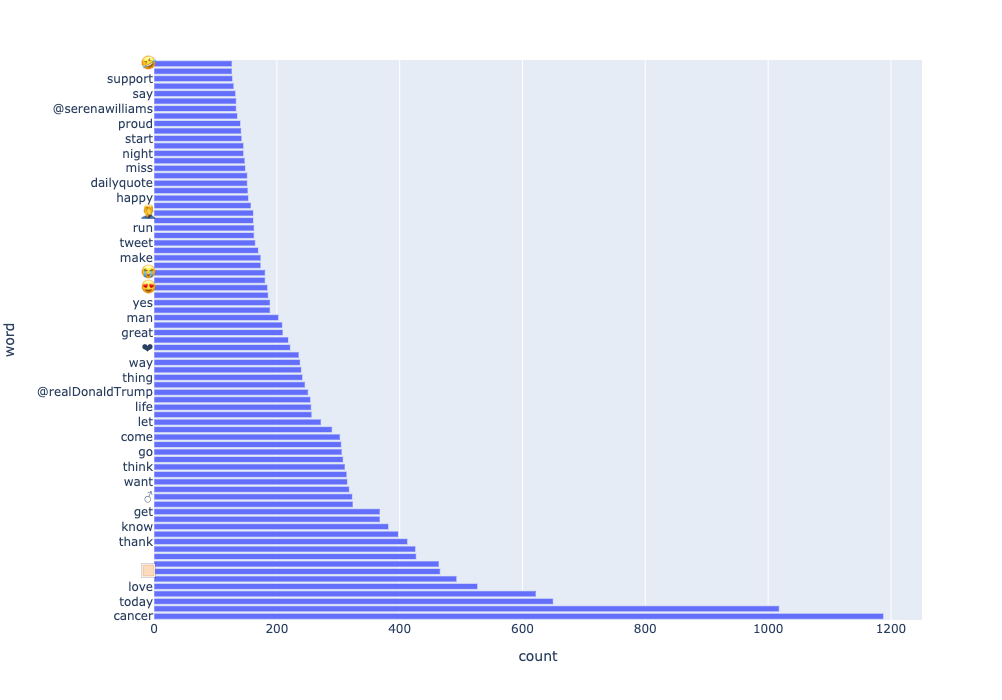

In [200]:
import plotly.express as px

px.bar(word_counts[:75],x='count', y='word', orientation='h'
      ,width=800, height=700)

In [225]:
mention_count.sort_values('count', ascending=False, inplace=True)

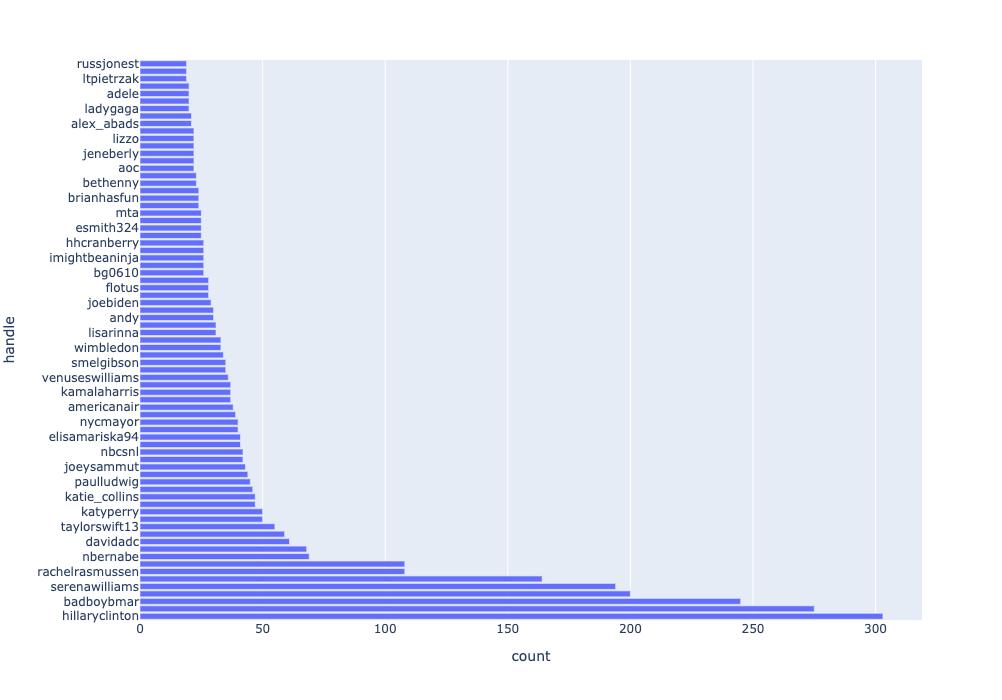

In [226]:
px.bar(mention_count[:75],x='count', y='handle', orientation='h'
      ,width=800, height=700)

In [212]:
from wordcloud import WordCloud
corpus_str = list(map(lambda x: (' ').join(x),corpus))

(-0.5, 399.5, 199.5, -0.5)

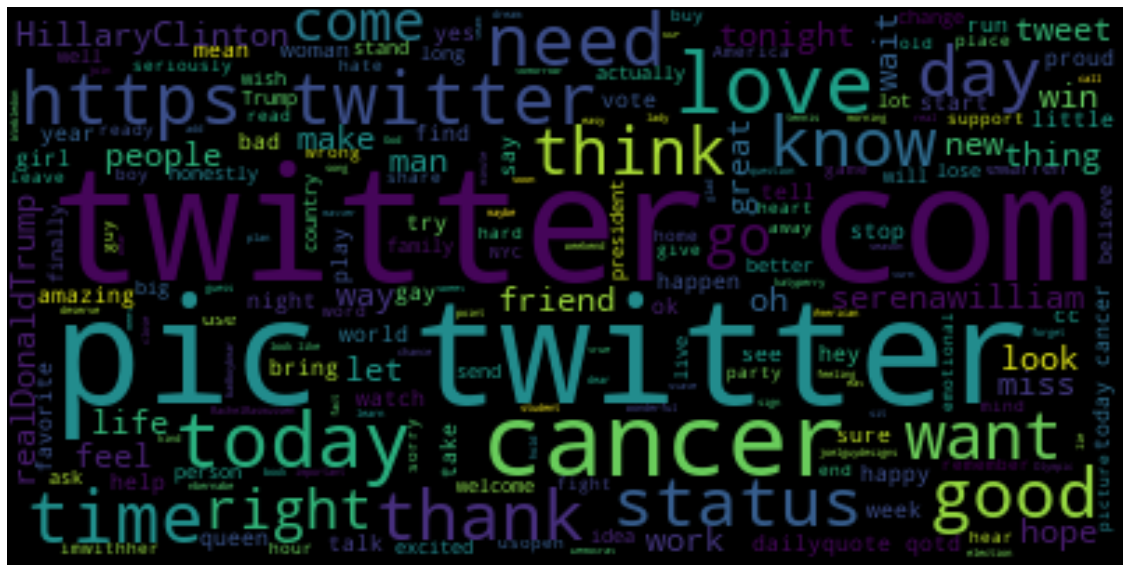

In [215]:
# Generate a word cloud image
wordcloud = WordCloud().generate((' ').join(corpus_str))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")